<a href="https://colab.research.google.com/github/kirtisoglu/Chicago-Census-TIF-GIS-Analysis/blob/main/Chicago_Census_Data_%26_TIF_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content

* Sections, content, sumamry

-? Kaynak ver, bu sunum buradan hazirlanmistir.

1. Finding data
2. Downloading data
3. Cleaning data
4. Normalizing data
5. Preparing data information
6. Analysing and mapping results



```
# This is formatted as code
```

# Sources

- Show the UCLA documents, how to launch them, how to access our github and colab files.

[1. UCLA Main Tutorial](https://www.youtube.com/watch?v=rrGw6ct-Cbw)

[2. UCLA documentation - Getting started with GIS](https://github.com/yohman/getting-started-with-gis/blob/5966855cf41d738dd8c149c0a0903e4470ca087c/Intro%20to%20GIS.ipynb)

[3. Our github repository](https://colab.research.google.com/drive/14BpCgg9ZXze1mGtJo_DvSjc0SUiR5bn1#scrollTo=HEpUpRcrSR5u&line=13&uniqifier=1)

[4. Youtube playlist by UCLA - GIS and spatial data](https://www.youtube.com/playlist?list=PL0dtAcxFkq3vn6gCXSPUmkG98O6LzIsgF)

# What is GIS?


*   Computer-based tools used to store, visualize, analyze, and interpret geographic data (spatial, or geospatial data).

*   Geographical data identifies the geographic location of features.

-? Spatial data & Non-spatial data examples, connection between them, the figure.

-? Explain how this is related to our projects.

-? How to find a geoprahical data?

# Where to get census data?

- [Census Bureau:](https://www.census.gov/data.html) Main source, but complicated

- [Census Reporter:](https://censusreporter.org/) Non-profit & avaliable to everybody

- [Chicago data portal](https://data.cityofchicago.org/)

UCLA presentation discuss how to get data. I got the corresponding data for Chicago. We will work on this.

https://censusreporter.org/tables/B03002/ - go to the page, and talk about data a little bit.
I already downloaded it.

# Data Properties

Summary Levels:

These are the fundamental summary levels of the Census:

010 The United States

040 States

050 Counties

140 Census Tracts

For each of these, the next level down is a perfect subdivision—that is, all of the "parent" geography is covered by the "children."



# Chicago Information

[blocks, tracts, community areas](https://www.lib.uchicago.edu/e/collections/maps/censusinfo.html) - UC page

[Boundries of Chicago](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Blocks-2010/mfzt-js4n) - Chicago data portal

# Pandas and Census Data

Libraries

- [geopandas:](https://geopandas.org/en/stable/) to read a geojson file ?. Spatial operations on geometric types

- [contextily](https://contextily.readthedocs.io/en/latest/): to add basemaps ?

renaming columns

normalizing data columns

simple stats

we will talk about simple operations in those libraries

In [ ]:
# To import a library that's not in Colaboratory by default, you can use
!pip install contextily

In [3]:
# to read and visualize spatial data
import geopandas as gpd

# to provide base maps
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt


In [82]:
# Load data
education = gpd.read_file('/content/acs2022_5yr_B14001_14000US17031490800.geojson')

# Data Properties

- skv

In [83]:
# get number of rows and columns
education.shape

(802, 23)

In [84]:
# display first 5 rows
education.head()

,geoid,name,B14001001,"B14001001, Error",B14001002,"B14001002, Error",B14001003,"B14001003, Error",B14001004,"B14001004, Error",...,"B14001006, Error",B14001007,"B14001007, Error",B14001008,"B14001008, Error",B14001009,"B14001009, Error",B14001010,"B14001010, Error",geometry
0,14000US17031010100,"Census Tract 101, Cook, IL",4220.0,644.0,529.0,230.0,27.0,67.0,0.0,12.0,...,75.0,105.0,115.0,116.0,106.0,171.0,117.0,3691.0,520.0,"MULTIPOLYGON (((-87.67720 42.02294, -87.67628 ..."
1,14000US17031010201,"Census Tract 102.01, Cook, IL",7576.0,878.0,2787.0,744.0,298.0,224.0,76.0,89.0,...,356.0,422.0,255.0,697.0,336.0,220.0,174.0,4789.0,698.0,"MULTIPOLYGON (((-87.68465 42.01949, -87.68432 ..."
2,14000US17031010202,"Census Tract 102.02, Cook, IL",2781.0,396.0,609.0,213.0,42.0,56.0,47.0,56.0,...,73.0,29.0,37.0,174.0,122.0,128.0,78.0,2172.0,284.0,"MULTIPOLYGON (((-87.67683 42.01941, -87.67674 ..."
3,14000US17031010300,"Census Tract 103, Cook, IL",6094.0,856.0,833.0,421.0,25.0,44.0,86.0,137.0,...,90.0,57.0,71.0,355.0,319.0,163.0,87.0,5261.0,526.0,"MULTIPOLYGON (((-87.67133 42.01937, -87.67121 ..."
4,14000US17031010400,"Census Tract 104, Cook, IL",4405.0,539.0,1936.0,284.0,0.0,12.0,0.0,12.0,...,12.0,33.0,38.0,1750.0,268.0,153.0,105.0,2469.0,539.0,"MULTIPOLYGON (((-87.66345 42.01283, -87.66321 ..."


<Axes: >

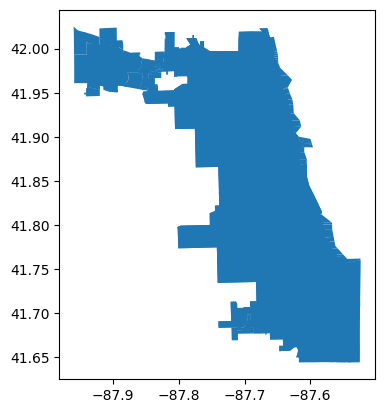

In [85]:
# plot data
education.plot()

In [8]:
# Pick three rows from data randomly and plot them

In [86]:
sample_education = education.sample(3)
sample_education

,geoid,name,B14001001,"B14001001, Error",B14001002,"B14001002, Error",B14001003,"B14001003, Error",B14001004,"B14001004, Error",...,"B14001006, Error",B14001007,"B14001007, Error",B14001008,"B14001008, Error",B14001009,"B14001009, Error",B14001010,"B14001010, Error",geometry
737,14000US17031836600,"Census Tract 8366, Cook, IL",2220.0,529.0,387.0,180.0,2.0,5.0,0.0,12.0,...,49.0,172.0,125.0,117.0,82.0,25.0,40.0,1833.0,472.0,"MULTIPOLYGON (((-87.71449 41.90277, -87.71426 ..."
430,14000US17031410800,"Census Tract 4108, Cook, IL",2824.0,449.0,1068.0,297.0,26.0,20.0,12.0,20.0,...,51.0,18.0,22.0,179.0,100.0,624.0,275.0,1756.0,273.0,"MULTIPOLYGON (((-87.59335 41.79511, -87.59312 ..."
601,14000US17031670700,"Census Tract 6707, Cook, IL",1024.0,214.0,276.0,107.0,26.0,27.0,51.0,31.0,...,29.0,68.0,48.0,18.0,28.0,0.0,12.0,748.0,141.0,"MULTIPOLYGON (((-87.66925 41.78669, -87.66900 ..."


<Axes: >

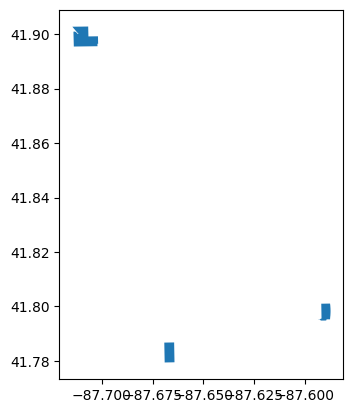

In [87]:
sample_education.plot()

# Data Types

- Typical data types: string, int, float64, datetime, etc.

- geopandas, geoseries, etc.

- To get the data types, we use .info()

In [88]:
# Look at columns, null values, and the data types
education.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             802 non-null    object  
 1   name              802 non-null    object  
 2   B14001001         802 non-null    float64 
 3   B14001001, Error  802 non-null    float64 
 4   B14001002         802 non-null    float64 
 5   B14001002, Error  802 non-null    float64 
 6   B14001003         802 non-null    float64 
 7   B14001003, Error  802 non-null    float64 
 8   B14001004         802 non-null    float64 
 9   B14001004, Error  802 non-null    float64 
 10  B14001005         802 non-null    float64 
 11  B14001005, Error  802 non-null    float64 
 12  B14001006         802 non-null    float64 
 13  B14001006, Error  802 non-null    float64 
 14  B14001007         802 non-null    float64 
 15  B14001007, Error  802 non-null    float64 
 16  B14001008         

# Geographic Identifiers

What is geoid? Why is it important? When you get another data, geoid's will be the same.

 - GEOIDs are very important for understanding and interpreting geographic and demographic data and their relationship to one another.

 - pairing the appropriate demographic data with the appropriate geographic data

 - GEOIDs are numeric codes that uniquely identify all administrative/legal and statistical geographic areas for which the Census Bureau tabulates data.

 - From Alaska, the largest state, to the smallest census block in New York City, every geographic area has a unique GEOID.

 - FIPS codes are assigned alphabetically by geographic name for states, counties,

https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html

put an example for Chicago


In [89]:
education.geoid.head()

0    14000US17031010100
1    14000US17031010201
2    14000US17031010202
3    14000US17031010300
4    14000US17031010400
Name: geoid, dtype: object

FIPS code of row 3 is 17 031 010202 (x)



17 -> Illinois State

031 -> Cook County

010202 -> Tract

x -> block group

https://learn.arcgis.com/en/related-concepts/united-states-census-geography.htm

# Data Cleaning and Preparetion

A data downloaded from censusreporter might have a "summary row" for the entire data. We need to delete it.
- Is there a summary row?

In [90]:
education.head()

,geoid,name,B14001001,"B14001001, Error",B14001002,"B14001002, Error",B14001003,"B14001003, Error",B14001004,"B14001004, Error",...,"B14001006, Error",B14001007,"B14001007, Error",B14001008,"B14001008, Error",B14001009,"B14001009, Error",B14001010,"B14001010, Error",geometry
0,14000US17031010100,"Census Tract 101, Cook, IL",4220.0,644.0,529.0,230.0,27.0,67.0,0.0,12.0,...,75.0,105.0,115.0,116.0,106.0,171.0,117.0,3691.0,520.0,"MULTIPOLYGON (((-87.67720 42.02294, -87.67628 ..."
1,14000US17031010201,"Census Tract 102.01, Cook, IL",7576.0,878.0,2787.0,744.0,298.0,224.0,76.0,89.0,...,356.0,422.0,255.0,697.0,336.0,220.0,174.0,4789.0,698.0,"MULTIPOLYGON (((-87.68465 42.01949, -87.68432 ..."
2,14000US17031010202,"Census Tract 102.02, Cook, IL",2781.0,396.0,609.0,213.0,42.0,56.0,47.0,56.0,...,73.0,29.0,37.0,174.0,122.0,128.0,78.0,2172.0,284.0,"MULTIPOLYGON (((-87.67683 42.01941, -87.67674 ..."
3,14000US17031010300,"Census Tract 103, Cook, IL",6094.0,856.0,833.0,421.0,25.0,44.0,86.0,137.0,...,90.0,57.0,71.0,355.0,319.0,163.0,87.0,5261.0,526.0,"MULTIPOLYGON (((-87.67133 42.01937, -87.67121 ..."
4,14000US17031010400,"Census Tract 104, Cook, IL",4405.0,539.0,1936.0,284.0,0.0,12.0,0.0,12.0,...,12.0,33.0,38.0,1750.0,268.0,153.0,105.0,2469.0,539.0,"MULTIPOLYGON (((-87.66345 42.01283, -87.66321 ..."


First row is not a summary row.

We should check the last row.

In [91]:
education.iloc[[-1]]

,geoid,name,B14001001,"B14001001, Error",B14001002,"B14001002, Error",B14001003,"B14001003, Error",B14001004,"B14001004, Error",...,"B14001006, Error",B14001007,"B14001007, Error",B14001008,"B14001008, Error",B14001009,"B14001009, Error",B14001010,"B14001010, Error",geometry
801,16000US1714000,"Chicago, IL",2626375.0,2351.0,632447.0,5425.0,39375.0,1446.0,28960.0,1534.0,...,2699.0,123962.0,2391.0,137308.0,3012.0,66976.0,2316.0,1993928.0,5762.0,"MULTIPOLYGON (((-87.94010 42.00079, -87.93993 ..."



It will be a problem, if we do statistical analysis over entire data. Delete it.

In [92]:
education.shape

(802, 23)

In [93]:
education.iloc[[799]]

,geoid,name,B14001001,"B14001001, Error",B14001002,"B14001002, Error",B14001003,"B14001003, Error",B14001004,"B14001004, Error",...,"B14001006, Error",B14001007,"B14001007, Error",B14001008,"B14001008, Error",B14001009,"B14001009, Error",B14001010,"B14001010, Error",geometry
799,14000US17043840000,"Census Tract 8400, DuPage, IL",2872.0,428.0,774.0,194.0,67.0,56.0,32.0,35.0,...,83.0,127.0,58.0,113.0,72.0,49.0,43.0,2098.0,324.0,"MULTIPOLYGON (((-87.95924 41.99113, -87.95923 ..."


In [ ]:
education = education.drop([799])

In [95]:
education.shape

(801, 23)

We should also delete the columns that are not needed. See the metadata.json file for the column names.

- We do not need errors.

- We prefer to use "Not enrolled in school" and "Not enrolled in school".

We print the column names.

In [97]:
list(education) # this is the same as df.columns.to_list() in pandas

['geoid',
 'name',
 'B14001001',
 'B14001001, Error',
 'B14001002',
 'B14001002, Error',
 'B14001003',
 'B14001003, Error',
 'B14001004',
 'B14001004, Error',
 'B14001005',
 'B14001005, Error',
 'B14001006',
 'B14001006, Error',
 'B14001007',
 'B14001007, Error',
 'B14001008',
 'B14001008, Error',
 'B14001009',
 'B14001009, Error',
 'B14001010',
 'B14001010, Error',
 'geometry']

We keep the following columns. Do not remove the column 'Total'. We will need it to normalize the data.

In [98]:
# create a list of columns to keep
keep_columns = ['geoid',
 'name',
 'B14001001',
 'B14001005',
 'B14001007',
 'B14001009',
 'B14001010',
 'geometry']

In [99]:
# redefine gdf with only columns to keep
education =education[keep_columns]

In [100]:
# Check the data set
education.head()

,geoid,name,B14001001,B14001005,B14001007,B14001009,B14001010,geometry
0,14000US17031010100,"Census Tract 101, Cook, IL",4220.0,45.0,105.0,171.0,3691.0,"MULTIPOLYGON (((-87.67720 42.02294, -87.67628 ..."
1,14000US17031010201,"Census Tract 102.01, Cook, IL",7576.0,501.0,422.0,220.0,4789.0,"MULTIPOLYGON (((-87.68465 42.01949, -87.68432 ..."
2,14000US17031010202,"Census Tract 102.02, Cook, IL",2781.0,39.0,29.0,128.0,2172.0,"MULTIPOLYGON (((-87.67683 42.01941, -87.67674 ..."
3,14000US17031010300,"Census Tract 103, Cook, IL",6094.0,89.0,57.0,163.0,5261.0,"MULTIPOLYGON (((-87.67133 42.01937, -87.67121 ..."
4,14000US17031010400,"Census Tract 104, Cook, IL",4405.0,0.0,33.0,153.0,2469.0,"MULTIPOLYGON (((-87.66345 42.01283, -87.66321 ..."


- Rename the columns. It will be easier to understand the content.

In [101]:
education.columns = ['geoid',
 'name',
 'Total',
 'Enrolled in grade 1 to grade 4',
 'Enrolled in grade 9 to grade 12',
 'Graduate or professional school',
 'Not enrolled in school',
 'geometry']

In [102]:
education.head()

,geoid,name,Total,Enrolled in grade 1 to grade 4,Enrolled in grade 9 to grade 12,Graduate or professional school,Not enrolled in school,geometry
0,14000US17031010100,"Census Tract 101, Cook, IL",4220.0,45.0,105.0,171.0,3691.0,"MULTIPOLYGON (((-87.67720 42.02294, -87.67628 ..."
1,14000US17031010201,"Census Tract 102.01, Cook, IL",7576.0,501.0,422.0,220.0,4789.0,"MULTIPOLYGON (((-87.68465 42.01949, -87.68432 ..."
2,14000US17031010202,"Census Tract 102.02, Cook, IL",2781.0,39.0,29.0,128.0,2172.0,"MULTIPOLYGON (((-87.67683 42.01941, -87.67674 ..."
3,14000US17031010300,"Census Tract 103, Cook, IL",6094.0,89.0,57.0,163.0,5261.0,"MULTIPOLYGON (((-87.67133 42.01937, -87.67121 ..."
4,14000US17031010400,"Census Tract 104, Cook, IL",4405.0,0.0,33.0,153.0,2469.0,"MULTIPOLYGON (((-87.66345 42.01283, -87.66321 ..."


- Total must be equal to the sum of other columns.

In [105]:
education['Total'] = education['Enrolled in grade 1 to grade 4'] + education['Enrolled in grade 9 to grade 12'] + education['Graduate or professional school'] + education['Not enrolled in school']

In [106]:
# Choose a random row to check if the total is the sum of the remaining columns
education.sample()

,geoid,name,Total,Enrolled in grade 1 to grade 4,Enrolled in grade 9 to grade 12,Graduate or professional school,Not enrolled in school,geometry
319,14000US17031251100,"Census Tract 2511, Cook, IL",3782.0,280.0,196.0,7.0,3299.0,"MULTIPOLYGON (((-87.75577 41.90225, -87.75553 ..."


# Simple Stats and plots

In [107]:
# What is the mean?
education['Total'].mean()

5775.621722846442

In [108]:
# What is the median?
education['Total'].median()

2625.0

In [109]:
# get some stats
education['Total'].describe()

count    8.010000e+02
mean     5.775622e+03
std      8.113412e+04
min      0.000000e+00
25%      1.664000e+03
50%      2.625000e+03
75%      3.815000e+03
max      2.298746e+06
Name: Total, dtype: float64

count: number of the records

std: standard deviation

min/max : minimum/maximum value in the column Total

<Axes: title={'center': 'Chicago census tracts by population size (ACS 2022 5-year)'}, ylabel='Frequency'>

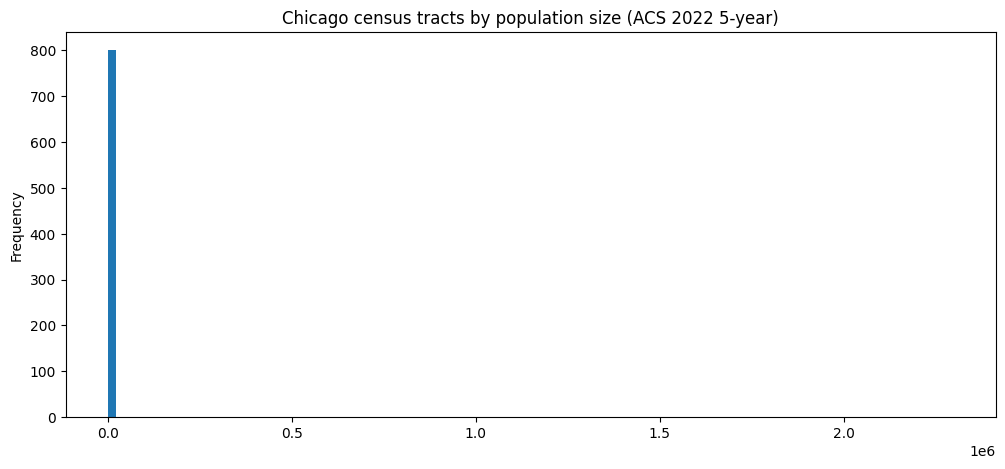

In [111]:
education['Total'].plot.hist(figsize=(12, 5), bins=100, title='Chicago census tracts by population size (ACS 2022 5-year)')

Fix the plot.

# TIF Data

In [112]:
tif = gpd.read_file('/content/chiTifBoundaries.shp')

In [113]:
tif.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   approval_d  131 non-null    object  
 1   comm_area   130 non-null    object  
 2   expiration  131 non-null    object  
 3   ind         130 non-null    object  
 4   name        131 non-null    object  
 5   name_trim   131 non-null    object  
 6   objectid    131 non-null    float64 
 7   objectid_1  131 non-null    float64 
 8   objectid_2  131 non-null    float64 
 9   objectid_3  131 non-null    float64 
 10  ref         131 non-null    object  
 11  repealed_d  0 non-null      object  
 12  sbif        130 non-null    object  
 13  shape_area  131 non-null    float64 
 14  shape_le_1  131 non-null    float64 
 15  shape_le_2  131 non-null    float64 
 16  shape_leng  131 non-null    float64 
 17  show        131 non-null    float64 
 18  type        130 non-null    object  
 19  

<Axes: >

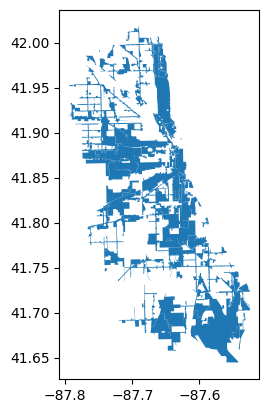

In [18]:
tif.plot()

In [19]:
tif.head()

,approval_d,comm_area,expiration,ind,name,name_trim,objectid,objectid_1,objectid_2,objectid_3,...,use,wards,OBJECTID_4,Join_Count,TARGET_FID,Shape_Le_3,Shape_Le_4,Shape_Ar_1,tif_number,geometry
0,9/9/1998,"15,16",12/31/2022,Mixed-use,Portage Park,Portage Park,3231.0,1.0,2.0,2.0,...,Mixed-use: Residential/Commercial/Industrial,"30,38,45",1,0,0,0.0,0.121211,0.0,58,"POLYGON ((-87.75331 41.96016, -87.75330 41.959..."
1,2/8/2006,"72,74,75",12/31/2030,Mixed-use,Western Avenue/Rock Island,Western Avenue/Rock Island,3249.0,2.0,3.0,3.0,...,Mixed-use: Commercial/Residential,"19,34",2,0,1,0.0,0.344189,0.0,142,"POLYGON ((-87.66736 41.72021, -87.66735 41.719..."
2,7/8/1998,"35,36,38,39",12/31/2022,Mixed-use,43rd Street/Cottage Grove Avenue,43rd Street/Cottage Grove Avenue,3261.0,3.0,4.0,4.0,...,Residential,"3,4",3,0,2,0.0,0.053312,0.0,55,"POLYGON ((-87.60970 41.82334, -87.60969 41.822..."
3,3/10/2010,"52, 55",12/31/2034,Mixed-use,Ewing Avenue,Ewing Avenue,3273.0,4.0,5.0,5.0,...,Mixed-use: Res/Comm/Indus/Instit,10,4,0,3,0.0,0.247098,0.0,169,"POLYGON ((-87.53587 41.72304, -87.53450 41.721..."
4,12/13/2000,"46,48 thru 52,54,55",12/31/2024,Industrial,Lake Calumet Area Industrial,Lake Calumet Area Industrial,3287.0,5.0,6.0,6.0,...,Industrial,"7,8,9,10",5,0,4,0.0,0.599034,0.0,103,"POLYGON ((-87.52691 41.72630, -87.52691 41.726..."


<Axes: >

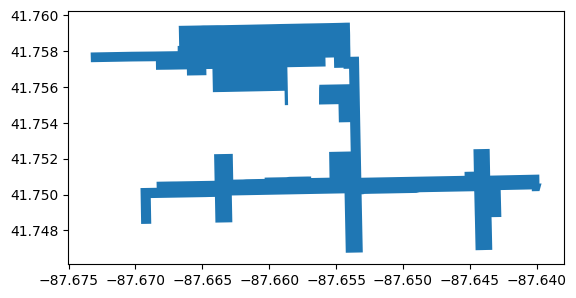

In [20]:
tif_row = tif.sample()
tif_row.plot()

In [21]:
tract_sample = gdf.sample()
tract_sample.plot()

NameError: name 'gdf' is not defined

In [ ]:
tif.head()

Try to find TIFs overlapped by the sampled tract.

In [ ]:
overlay = gpd.overlay(tract_sample, tif, how='identity', keep_geom_type=None, make_valid=True)
overlay


In [ ]:
tract_sample.plot()

In [ ]:

ax = overlay.plot(cmap='tab10')

tract_sample.plot(ax=ax, facecolor='none', edgecolor='k');

tif.plot(ax=ax, facecolor='none', edgecolor='k');


In [ ]:
import numpy as np


In [ ]:
gdf["gdfrow"] = np.arange(0, gdf.shape[0]).astype(int).astype(str) #Create a row number, to later groupby
tif["tifrow"] = np.arange(0, tif.shape[0]).astype(int).astype(str) #Create a row number column

join = gpd.sjoin(left_df=gdf[["gdfrow","geometry"]], right_df=tif[["tifrow","geometry"]], how="left", predicate="intersects")
print(join[["gdfrow","tifrow"]])


In [ ]:
#Groupby titrerow and concatenate the df rows
intersecting = join.groupby("gdfrow")["tifrow"].apply(lambda x: ','.join(x))
#0    1,2,0
#1        4
#2        4

#Join the result to input
gdf = gdf.merge(intersecting, left_on="gdfrow", right_index=True)